In [ ]:
import sys
import os
from pathlib import Path

current_dir = os.getcwd()

file = Path(current_dir).resolve()
sys.path.append(str(file.parents[0]))

In [2]:
from argparse import Namespace
from data.bids_dataset import BidsDataset
from utils.brats_tools import temperature_scaled_softmax
import torch
from utils.brats_tools import plot_slices, get_central_slice
relu = torch.nn.ReLU()
softmax = torch.nn.Softmax(dim=0)

In [3]:
data_dir = '/home/student/farid_ma/dev/multiclass_softseg/MulticlassSoftSeg/data/external/ASNR-MICCAI-BraTS2023-GLI-Challenge'

In [4]:
def round_probs(probs,tolerance = 1000):
    return torch.round(probs*tolerance)/tolerance

In [5]:
def print_unique_etc(tensor):
    print(f"unique values in soft gt: {torch.unique(tensor)}")
    print(f"unique sums across all channels {torch.unique(tensor.sum(dim=0), return_counts=True)}") 

In [6]:
def prob_normalization(probs):
    print(f"Soft Probs:")
    print_unique_etc(probs)

# Experiment 1

In [37]:
dilate = 0
temp = None
sigma = 0.125
conf = Namespace(resize = (152, 192, 144), contrast = 'multimodal', one_hot = False, sigma = sigma, do2D = False, soft=False, dilate=dilate, binary=False, ds_factor=None, experiment = 1, softmax_temperature=temp)
bids_ds = BidsDataset(conf, data_dir+'/train')

In [38]:
idx = 0
sample = bids_ds[idx]
sample_img = sample['img']
sample_gt = sample['seg']
sample_soft_gt = sample['soft_seg']

## Looking at unique values etc.

In [39]:
prob_normalization(round_probs(sample_soft_gt, 10000))

Soft Probs:
unique values in soft gt: tensor([0., 1.])
unique sums across all channels (metatensor([1.]), metatensor([4202496]))


In [40]:
prob_normalization(sample_soft_gt)

Soft Probs:
unique values in soft gt: tensor([0.0000e+00, 2.0305e-42, 4.0624e-42, 6.0928e-42, 8.1247e-42, 1.6038e-28,
        3.2076e-28, 4.8114e-28, 6.4152e-28, 8.0191e-28, 9.6229e-28, 1.1227e-27,
        1.2664e-14, 2.5328e-14, 3.7992e-14, 5.0657e-14, 6.3321e-14, 7.5985e-14,
        1.0000e+00])
unique sums across all channels (metatensor([1.]), metatensor([4202496]))


## Plots

### Plot Hard GTs

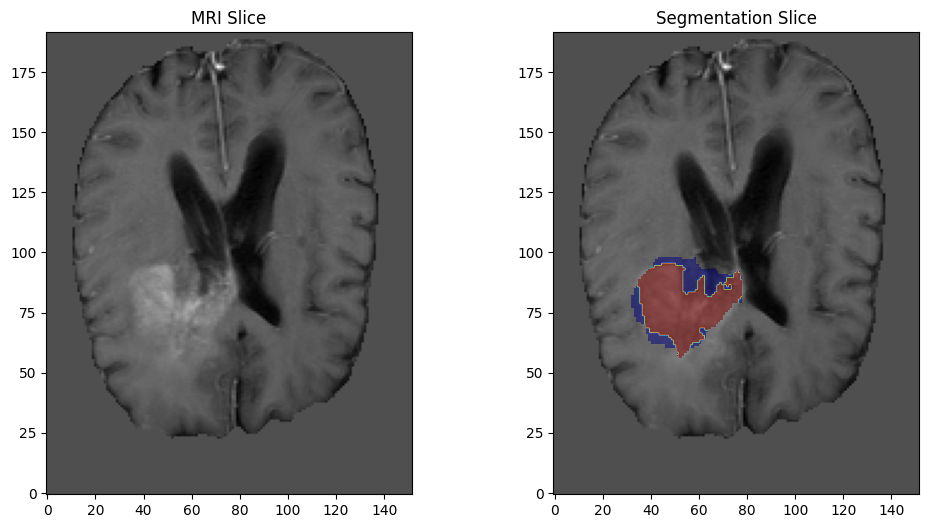

In [41]:
axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_gt, axis))

### Plot Soft GTs

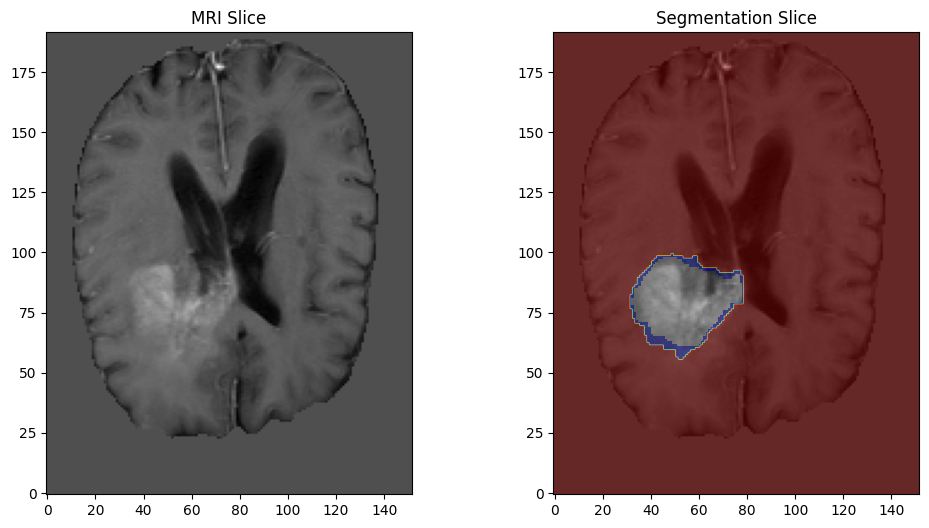

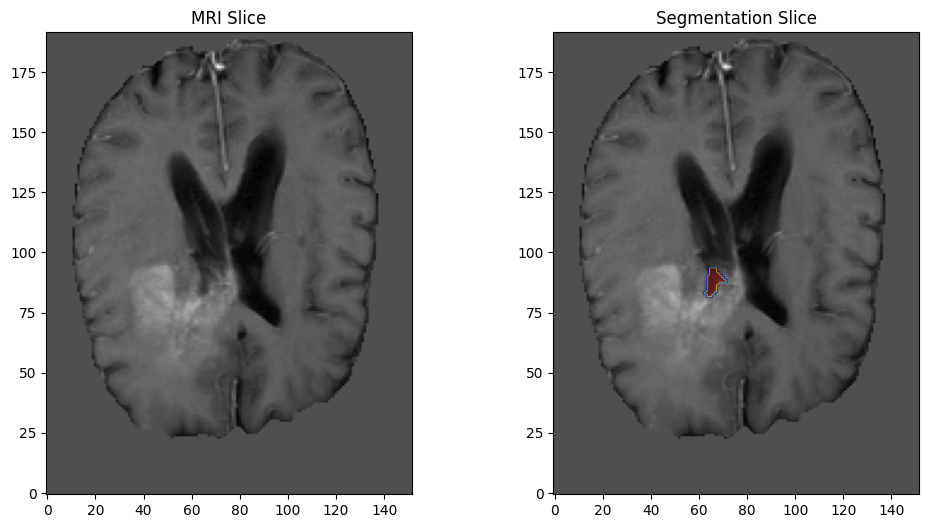

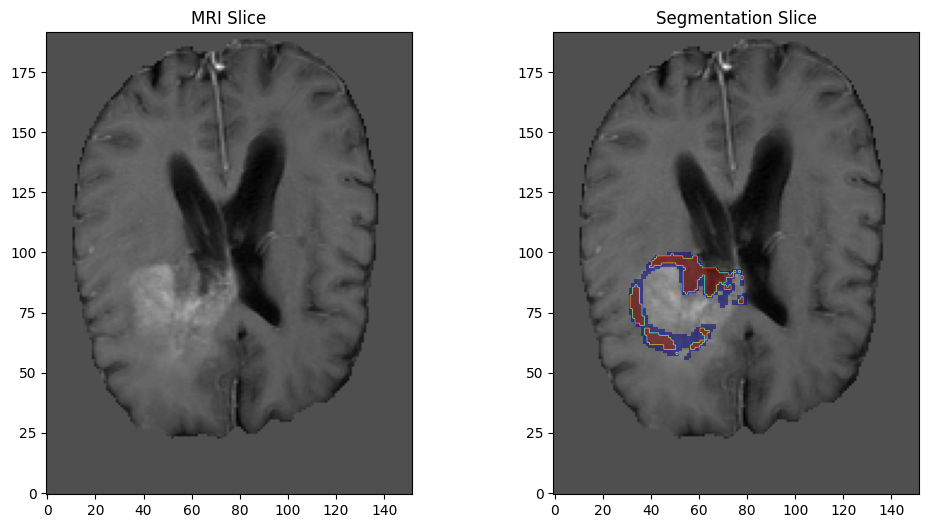

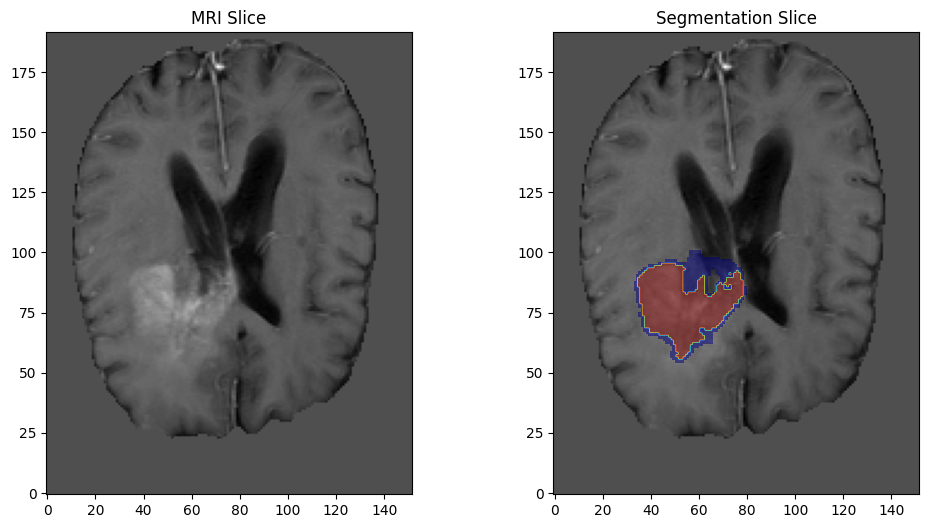

In [42]:
axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[0], axis))
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[1], axis))
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[2], axis))
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[3], axis))

# With Dilation

In [68]:
dilate = 1
temp = 0.2
sigma = 0.5
conf = Namespace(resize = (152, 192, 144), contrast = 'multimodal', one_hot = False, sigma = sigma, do2D = False, soft=False, dilate=dilate, binary=False, ds_factor=None, experiment = 1, softmax_temperature = temp)
bids_ds = BidsDataset(conf, data_dir+'/train')

In [69]:
idx = 0
sample = bids_ds[idx]
sample_img = sample['img']
sample_gt = sample['seg']
sample_soft_gt = sample['soft_seg']

## Looking at unique values etc.

In [70]:
prob_normalization(round_probs(sample_soft_gt, 10000))

Soft Probs:
unique values in soft gt: tensor([0.0022, 0.0023, 0.0024,  ..., 0.9800, 0.9801, 0.9802])
unique sums across all channels (metatensor([0.9999, 0.9999, 0.9999, 0.9999, 1.0000, 1.0000, 1.0000, 1.0000, 1.0001,
        1.0001, 1.0001]), metatensor([    310,   22870,   11156,    1771,       9,    3006, 4136641,    1252,
           1300,   23623,     558]))


In [71]:
prob_normalization(sample_soft_gt)

Soft Probs:
unique values in soft gt: tensor([0.0022, 0.0022, 0.0022,  ..., 0.9802, 0.9802, 0.9802])
unique sums across all channels (metatensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]), metatensor([      1,      56,    7172, 4045503,  138237,   11520,       7]))


## Plots

### Plot Hard GTs

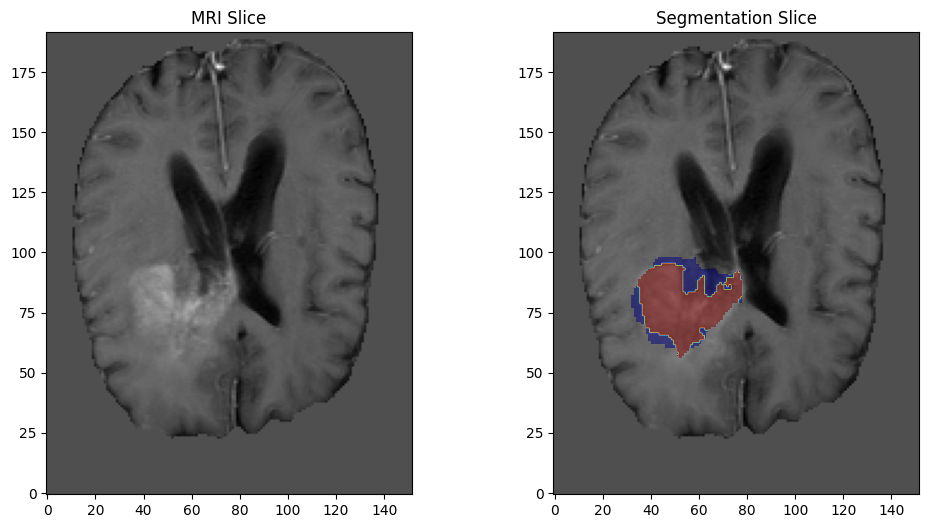

In [72]:
axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_gt, axis))

### Plot Soft GTs

In [73]:
x, y = (50, 75)
print(f"value at {x, y}: {get_central_slice(sample_soft_gt[0])[x, y]}")

value at (50, 75): 0.00660444051027298


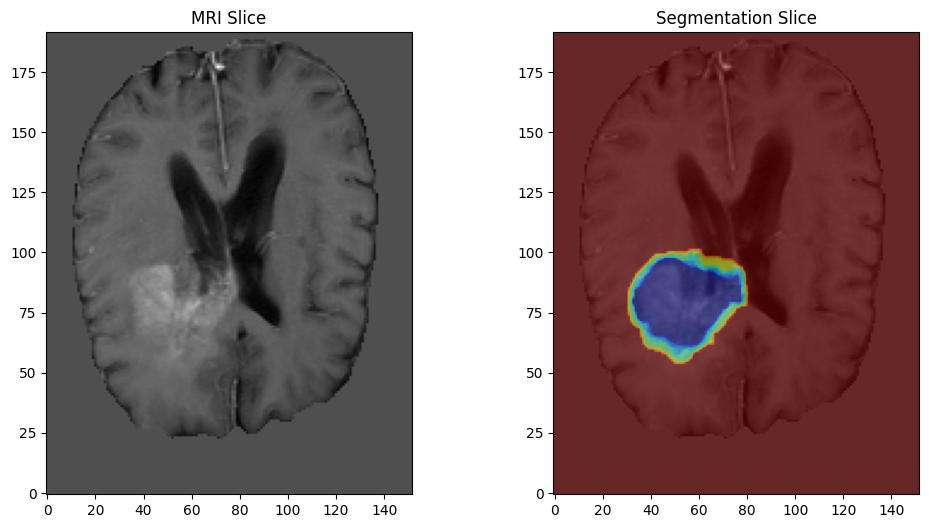

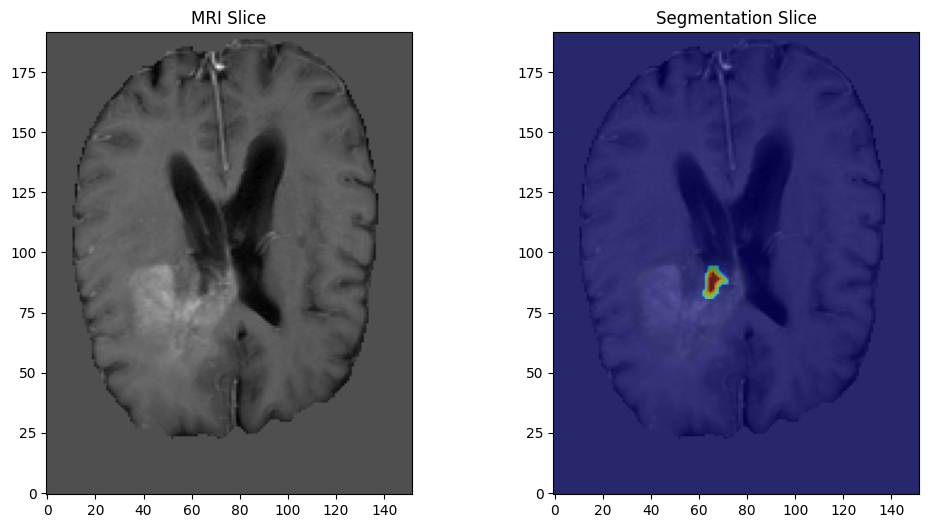

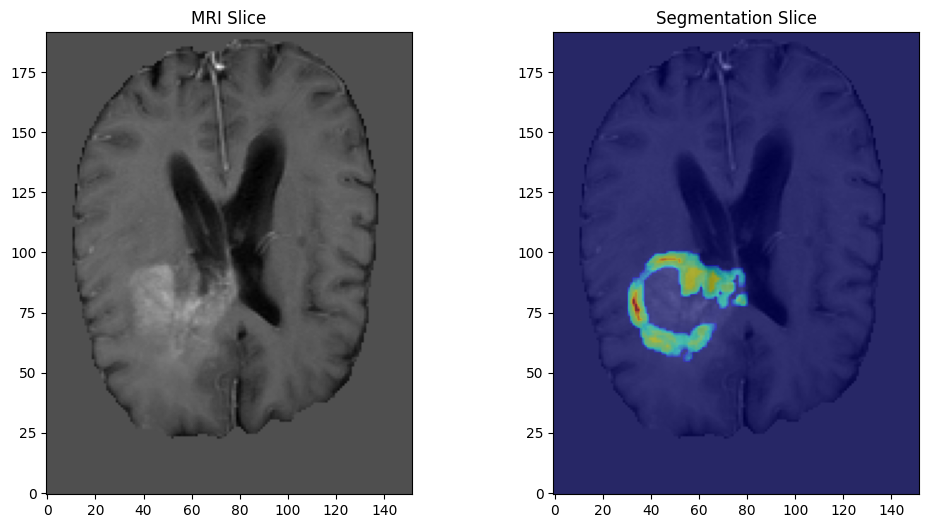

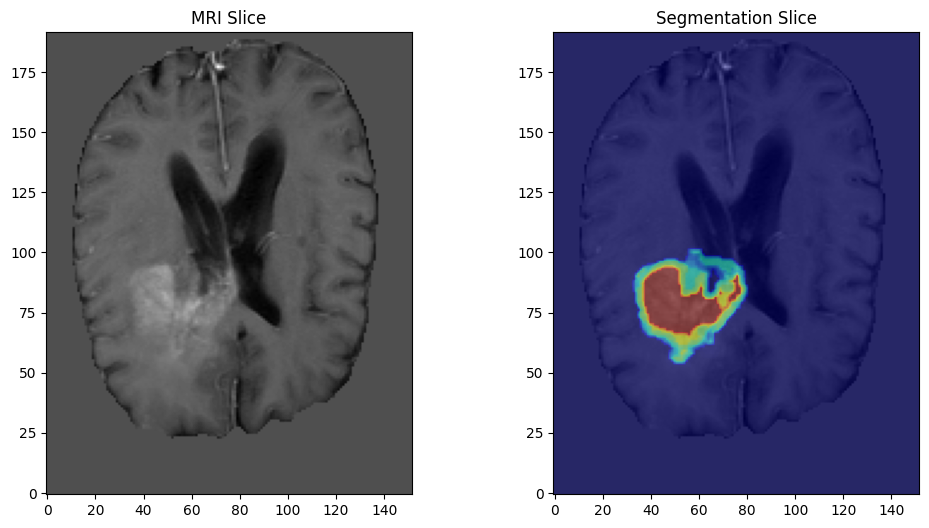

In [74]:
axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[0], axis))
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[1], axis))
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[2], axis))
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[3], axis))

# Experiment 2

In [92]:
conf = Namespace(resize = (160, 192, 144), contrast = 'multimodal', one_hot = False, sigma = 0.25, do2D = False, soft=False, dilate=0, binary=True, ds_factor=2, experiment = 2)
bids_ds = BidsDataset(conf, data_dir+'/train')
print(bids_ds.opt)

Namespace(resize=(160, 192, 144), contrast='multimodal', one_hot=False, sigma=0.25, do2D=False, soft=False, dilate=0, binary=True, ds_factor=2, experiment=2)


In [93]:
idx = 0
sample = bids_ds[idx]
sample_img = sample['img']
sample_gt = sample['seg']
sample_soft_gt = sample['soft_seg']

## Looking at unique values etc.

In [94]:
print(f"unique values in soft gt: {torch.unique(sample_soft_gt)}")
print(f"unique sums across all channels {torch.unique(sample_soft_gt.sum(dim=0))}")

unique values in soft gt: tensor([0.0000, 0.1250, 0.2500, 0.3750, 0.5000, 0.6250, 0.7500, 0.8750, 1.0000])
unique sums across all channels tensor([1.])


In [95]:
normalized_soft_gt = softmax(sample_soft_gt)
print(f"unique values in soft gt: {torch.unique(normalized_soft_gt)}")
print(f"unique sums across all channels {torch.unique(normalized_soft_gt.sum(dim=0))}")

unique values in soft gt: tensor([0.2689, 0.3208, 0.3775, 0.4378, 0.5000, 0.5622, 0.6225, 0.6792, 0.7311])
unique sums across all channels tensor([1.])


In [96]:
if bool(relu(sample_soft_gt).max()):
    normalized_soft_gt = relu(sample_soft_gt)/relu(sample_soft_gt).max() 
else:
    normalized_soft_gt  = relu(sample_soft_gt)  # applying ReLU to the logits to get probabilites

print(f"unique values in soft gt: {torch.unique(normalized_soft_gt)}")
print(f"unique sums across all channels {torch.unique(normalized_soft_gt.sum(dim=0))}")

unique values in soft gt: tensor([0.0000, 0.1250, 0.2500, 0.3750, 0.5000, 0.6250, 0.7500, 0.8750, 1.0000])
unique sums across all channels tensor([1.])


## Plots

### Plot Hard GTs

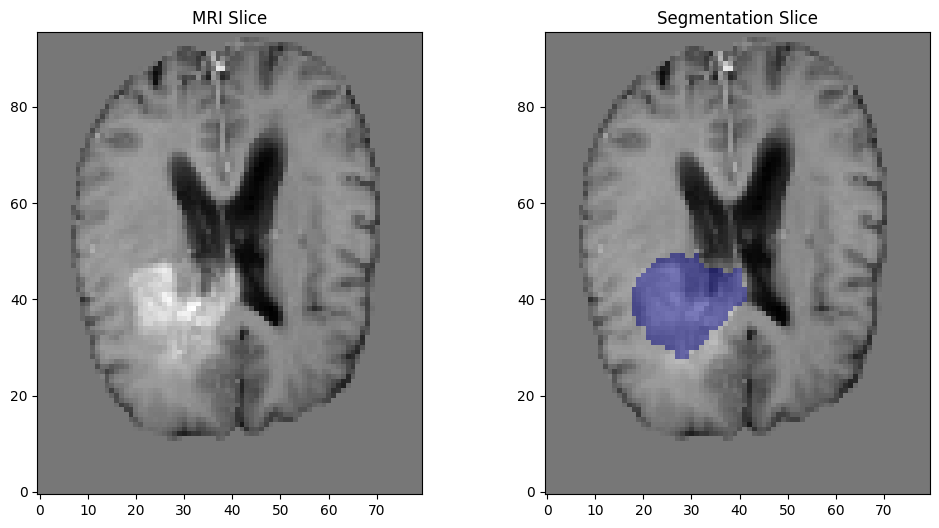

In [57]:
axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_gt, axis))

### Plot Soft GTs

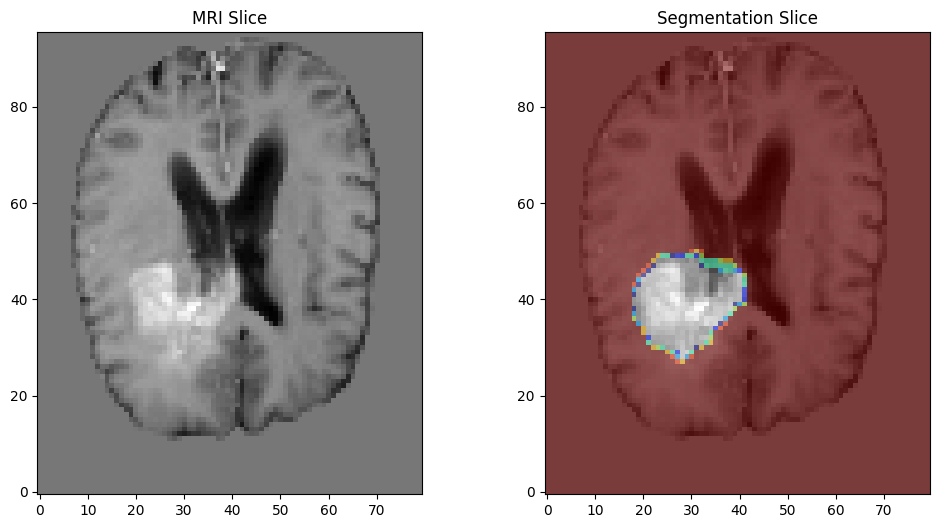

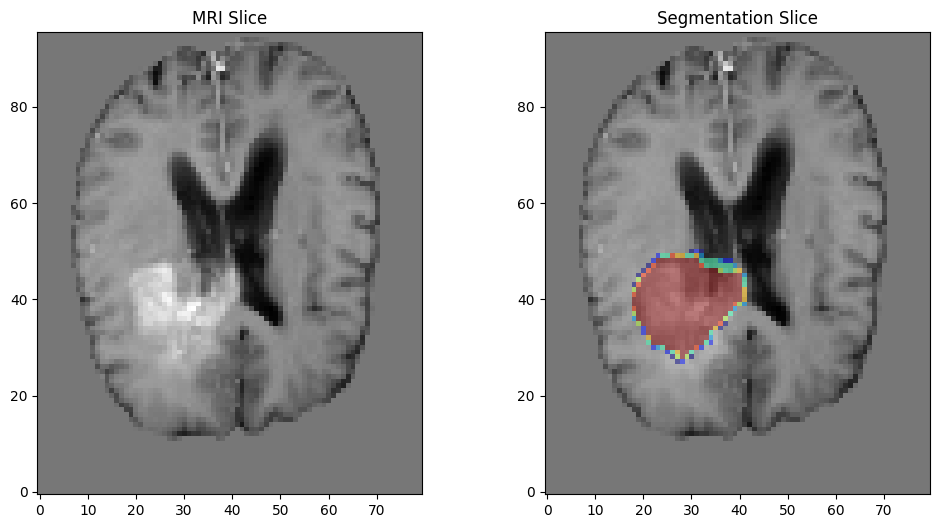

In [58]:
axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[0], axis))
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[1], axis))

# With Dilation

In [97]:
dilate = 1
conf = Namespace(resize = (160, 192, 144), contrast = 'multimodal', one_hot = False, sigma = 0.25, do2D = False, soft=False, dilate=0, binary=True, ds_factor=2, experiment = 2)
bids_ds = BidsDataset(conf, data_dir+'/train')
print(bids_ds.opt)

Namespace(resize=(160, 192, 144), contrast='multimodal', one_hot=False, sigma=0.25, do2D=False, soft=False, dilate=0, binary=True, ds_factor=2, experiment=2)


In [98]:
idx = 0
sample = bids_ds[idx]
sample_img = sample['img']
sample_gt = sample['seg']
sample_soft_gt = sample['soft_seg']

## Looking at unique values etc.

In [99]:
print(f"unique values in soft gt: {torch.unique(sample_soft_gt)}")
print(f"unique sums across all channels {torch.unique(sample_soft_gt.sum(dim=0))}")

unique values in soft gt: tensor([0.0000, 0.1250, 0.2500, 0.3750, 0.5000, 0.6250, 0.7500, 0.8750, 1.0000])
unique sums across all channels tensor([1.])


In [100]:
normalized_soft_gt = softmax(sample_soft_gt)
print(f"unique values in soft gt: {torch.unique(normalized_soft_gt)}")
print(f"unique sums across all channels {torch.unique(normalized_soft_gt.sum(dim=0))}")

unique values in soft gt: tensor([0.2689, 0.3208, 0.3775, 0.4378, 0.5000, 0.5622, 0.6225, 0.6792, 0.7311])
unique sums across all channels tensor([1.])


In [101]:
if bool(relu(sample_soft_gt).max()):
    normalized_soft_gt = relu(sample_soft_gt)/relu(sample_soft_gt).max() 
else:
    normalized_soft_gt  = relu(sample_soft_gt)  # applying ReLU to the logits to get probabilites

print(f"unique values in soft gt: {torch.unique(normalized_soft_gt)}")
print(f"unique sums across all channels {torch.unique(normalized_soft_gt.sum(dim=0))}")

unique values in soft gt: tensor([0.0000, 0.1250, 0.2500, 0.3750, 0.5000, 0.6250, 0.7500, 0.8750, 1.0000])
unique sums across all channels tensor([1.])


## Plots

### Plot Hard GTs

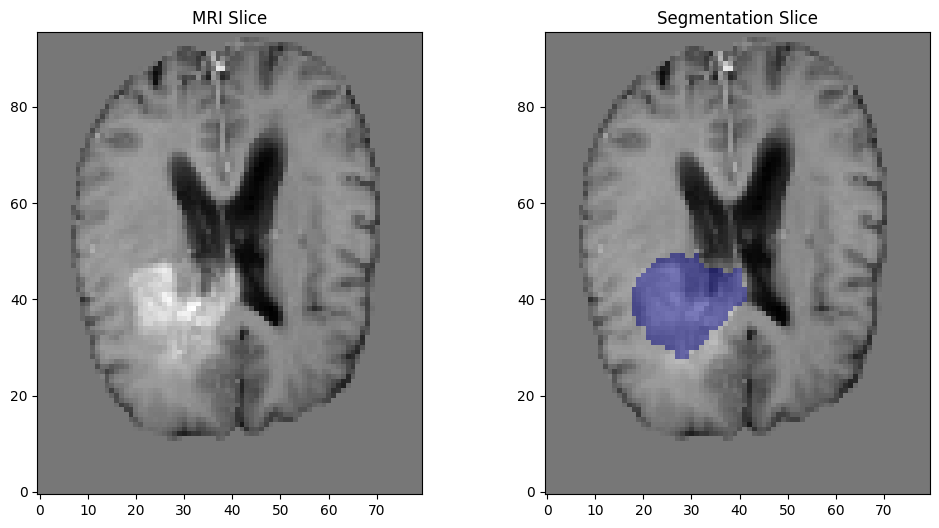

In [63]:
axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_gt, axis))

### Plot Soft GTs

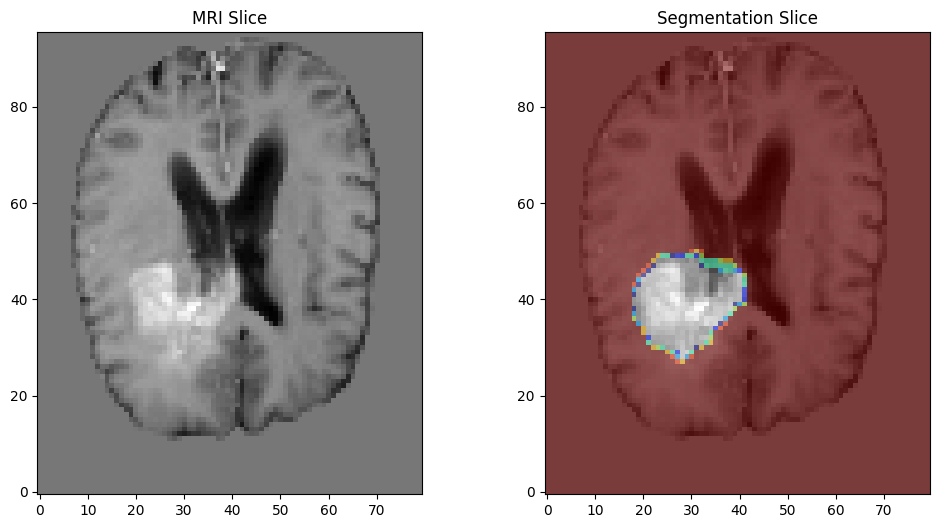

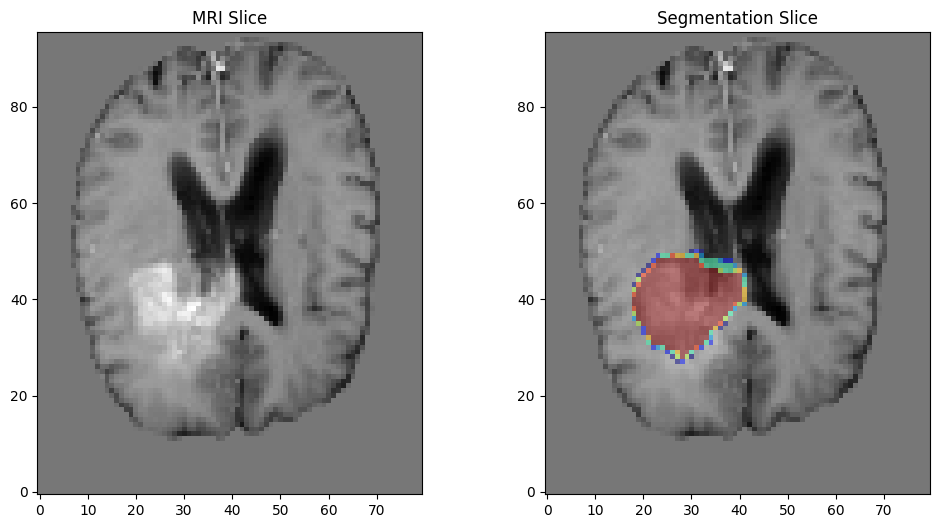

In [64]:
axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[0], axis))
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[1], axis))

# Experiment 3

In [74]:
conf = Namespace(resize = (152, 192, 144), contrast = 'multimodal', one_hot = False, sigma = 0.25, do2D = False, soft=False, dilate=0, binary=True, ds_factor=2, experiment=3)
bids_ds = BidsDataset(conf, data_dir+'/train')

In [75]:
idx = 0
sample = bids_ds[idx]
sample_img = sample['img']
sample_gt = sample['seg']
sample_soft_gt = sample['soft_seg']

## Looking at unique values etc.

In [76]:
print(f"unique values in soft gt: {torch.unique(sample_soft_gt)}")
print(f"unique sums across all channels {torch.unique(sample_soft_gt.sum(dim=0))}")

unique values in soft gt: tensor([0.0000e+00, 3.7675e-11, 7.5351e-11, 1.1303e-10, 1.1231e-07, 1.1235e-07,
        1.1238e-07, 1.1242e-07, 2.2466e-07, 2.2469e-07, 2.2473e-07, 2.2477e-07,
        3.3696e-07, 3.3700e-07, 3.3704e-07, 3.3708e-07, 4.4931e-07, 4.4935e-07,
        4.4939e-07, 4.4942e-07, 5.6162e-07, 5.6166e-07, 5.6170e-07, 5.6173e-07,
        3.3479e-04, 3.3479e-04, 3.3490e-04, 3.3490e-04, 3.3490e-04, 3.3501e-04,
        3.3501e-04, 3.3501e-04, 3.3501e-04, 3.3501e-04, 3.3513e-04, 3.3513e-04,
        3.3513e-04, 3.3513e-04, 3.3513e-04, 3.3524e-04, 3.3524e-04, 3.3524e-04,
        3.3524e-04, 3.3524e-04, 3.3535e-04, 3.3535e-04, 3.3535e-04, 3.3535e-04,
        3.3535e-04, 3.3546e-04, 3.3546e-04, 3.3546e-04, 3.3546e-04, 3.3557e-04,
        3.3557e-04, 3.3557e-04, 3.3569e-04, 6.6969e-04, 6.6969e-04, 6.6980e-04,
        6.6980e-04, 6.6991e-04, 6.6991e-04, 6.6991e-04, 6.7003e-04, 6.7003e-04,
        6.7003e-04, 6.7014e-04, 6.7014e-04, 6.7014e-04, 6.7025e-04, 6.7025e-04,
        6.7025

In [ ]:
normalized_soft_gt = softmax(sample_soft_gt)
print(f"unique values in soft gt: {torch.unique(normalized_soft_gt)}")
print(f"unique sums across all channels {torch.unique(normalized_soft_gt.sum(dim=0))}")

In [77]:
if bool(relu(sample_soft_gt).max()):
    normalized_soft_gt = relu(sample_soft_gt)/relu(sample_soft_gt).max() 
else:
    normalized_soft_gt  = relu(sample_soft_gt)  # applying ReLU to the logits to get probabilites

print(f"unique values in soft gt: {torch.unique(normalized_soft_gt)}")
print(f"unique sums across all channels {torch.unique(normalized_soft_gt.sum(dim=0))}")

unique values in soft gt: tensor([0.2689, 0.2689, 0.2689, 0.2689, 0.2689, 0.2689, 0.2691, 0.2691, 0.2691,
        0.2691, 0.2691, 0.2691, 0.2691, 0.2691, 0.2691, 0.2692, 0.2692, 0.2692,
        0.2692, 0.2692, 0.2692, 0.2692, 0.2692, 0.2692, 0.2693, 0.2693, 0.2693,
        0.2693, 0.2693, 0.2693, 0.2693, 0.2695, 0.2695, 0.2695, 0.2695, 0.2695,
        0.2695, 0.2696, 0.2696, 0.2696, 0.7304, 0.7304, 0.7305, 0.7305, 0.7305,
        0.7305, 0.7305, 0.7307, 0.7307, 0.7307, 0.7307, 0.7308, 0.7308, 0.7308,
        0.7308, 0.7308, 0.7308, 0.7309, 0.7309, 0.7309, 0.7309, 0.7309, 0.7309,
        0.7311, 0.7311, 0.7311, 0.7311])
unique sums across all channels tensor([1.0000, 1.0000])


## Plots

### Plot Hard GTs

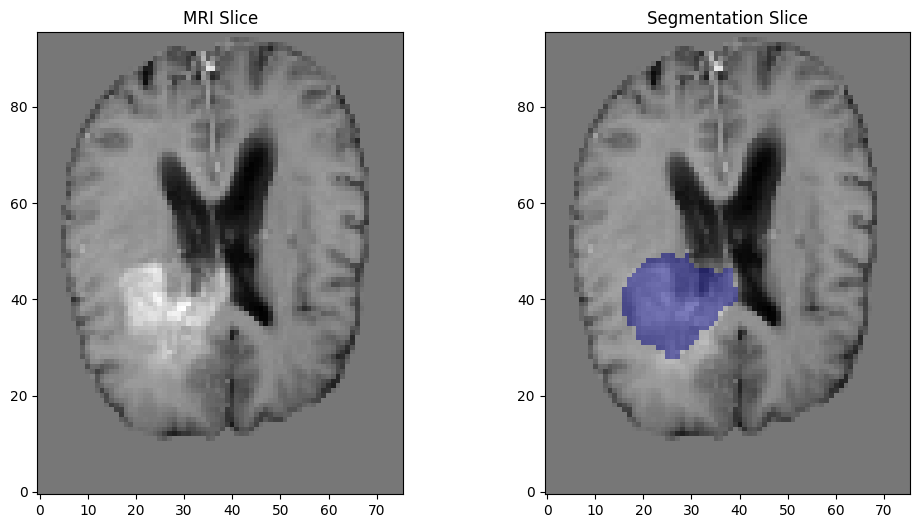

In [78]:
axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_gt, axis))

### Plot Soft GTs

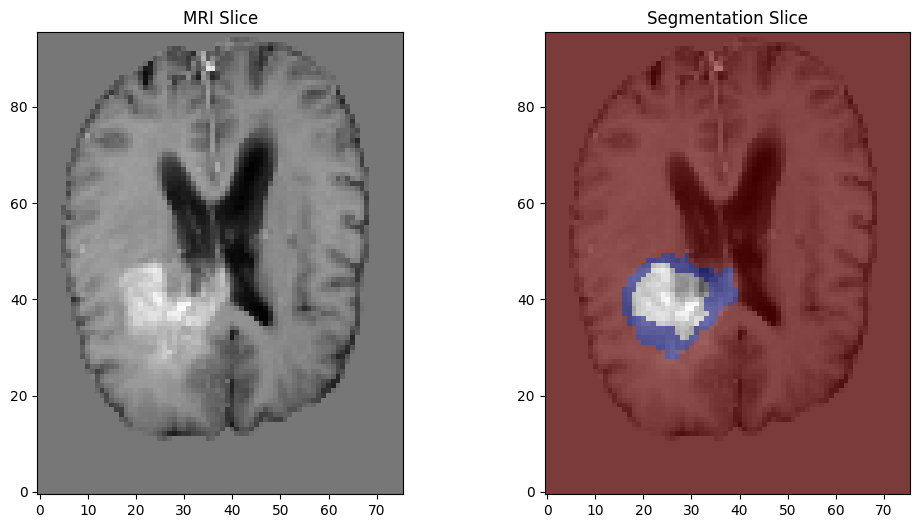

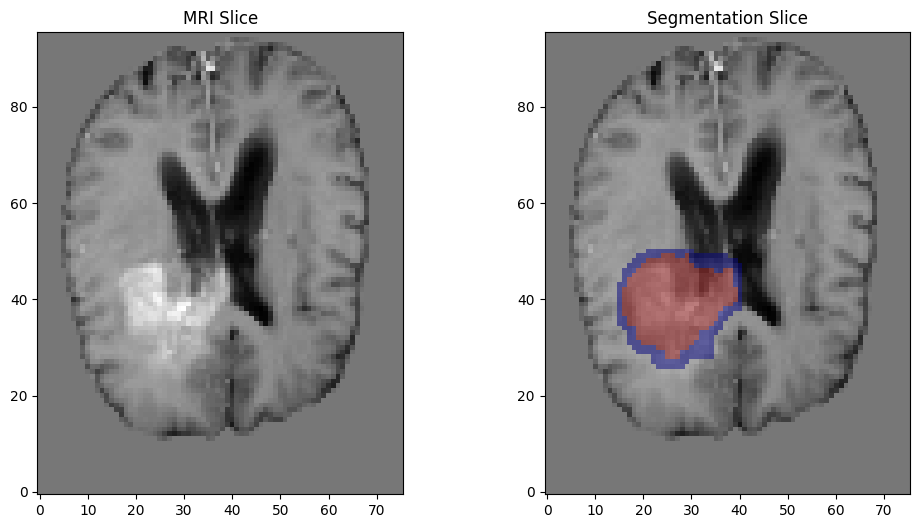

In [79]:

axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[0], axis))
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[1], axis))

# With Dilation

In [80]:
dilate = 1
conf = Namespace(resize = (152, 192, 144), contrast = 'multimodal', one_hot = False, sigma = 0.125, do2D = False, soft=False, dilate=0, binary=True, ds_factor=2, experiment=3)
bids_ds = BidsDataset(conf, data_dir+'/train')
print(bids_ds.opt)

Namespace(resize=(152, 192, 144), contrast='multimodal', one_hot=False, sigma=0.125, do2D=False, soft=False, dilate=0, binary=True, ds_factor=2, experiment=3)


In [81]:
idx = 0
sample = bids_ds[idx]
sample_img = sample['img']
sample_gt = sample['seg']
sample_soft_gt = sample['soft_seg']

## Looking at unique values etc.

In [82]:
print(f"unique values in soft gt: {torch.unique(sample_soft_gt)}")
print(f"unique sums across all channels {torch.unique(sample_soft_gt.sum(dim=0))}")

unique values in soft gt: tensor([0.0000e+00, 2.0305e-42, 4.0624e-42, 6.0928e-42, 1.6038e-28, 3.2076e-28,
        4.8114e-28, 6.4152e-28, 8.0191e-28, 1.2664e-14, 2.5328e-14, 3.7992e-14,
        5.0657e-14, 6.3321e-14, 1.0000e+00])
unique sums across all channels tensor([1.])


In [ ]:
normalized_soft_gt = softmax(sample_soft_gt)
print(f"unique values in soft gt: {torch.unique(normalized_soft_gt)}")
print(f"unique sums across all channels {torch.unique(normalized_soft_gt.sum(dim=0))}")

In [ ]:
if bool(relu(sample_soft_gt).max()):
    normalized_soft_gt = relu(sample_soft_gt)/relu(sample_soft_gt).max() 
else:
    normalized_soft_gt  = relu(sample_soft_gt)  # applying ReLU to the logits to get probabilites

print(f"unique values in soft gt: {torch.unique(normalized_soft_gt)}")
print(f"unique sums across all channels {torch.unique(normalized_soft_gt.sum(dim=0))}")

## Plots

### Plot Hard GTs

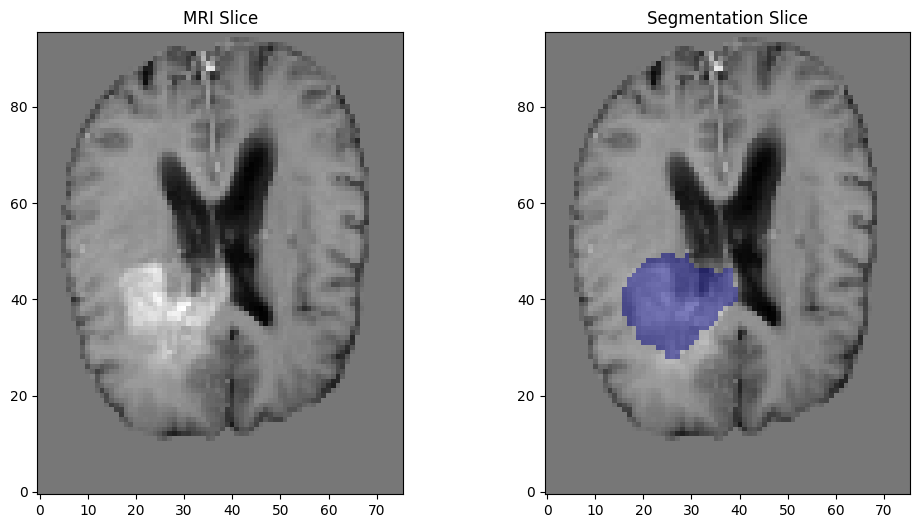

In [83]:
axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_gt, axis))

### Plot Soft GTs

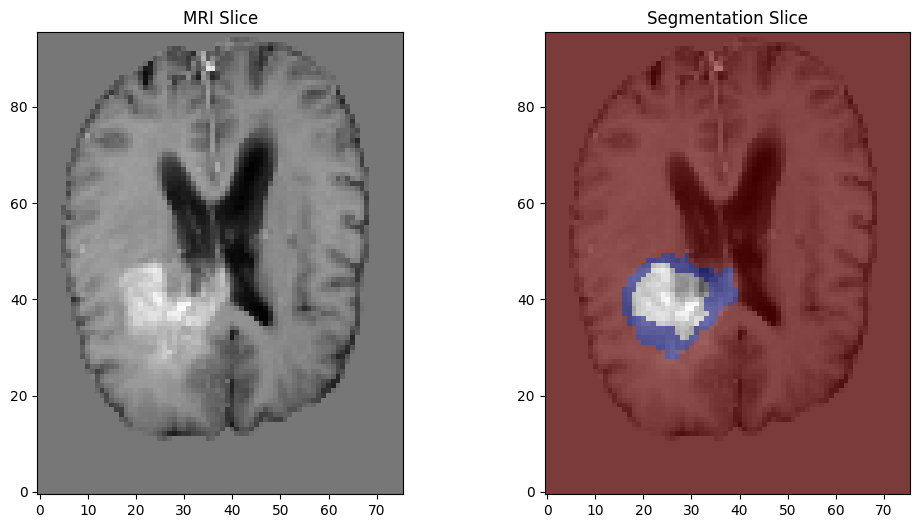

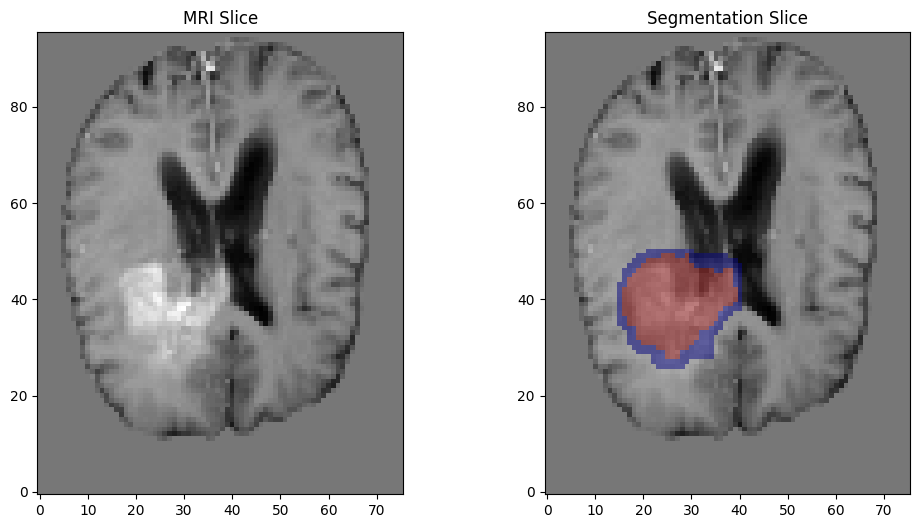

In [84]:
axis = 2
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[0], axis))
plot_slices(get_central_slice(sample_img[0], axis), get_central_slice(sample_soft_gt[1], axis))